In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

1. csv 폴더에서 Sales Records.csv 파일을 로드 (sales 변수에 저장)
2. 원본 데이터에서 복사본 하나 생성 (df변수에 복사본 저장)
3. 'Order ID', 'Total Cost', 'Total profit', 'Total Reveue', 'Order priority' 컬럼을 제거
4. 컬럼의 이름을 변경 => ['대륙','국가','상품종류','판매채널','주문일자','발송일자', '판매개수', '단가', '원가']
5. 데이터프레임 전체적인 정보를 확인
    - 구조 확인
    - 통계량 확인
    - 결측치 확인
6. 대륙, 국가를 기준으로 데이터를 오름차순 정렬
7. 인덱스를 초기화하고 기존의 인덱스를 제거
8. 파생변수 생성
    - 총단가 : 판매개수 * 단가
    - 총원가 : 판매개수 * 원가
    - 총이윤 : 총단가 - 총원가

In [2]:
sales = pd.read_csv('./../csv/Sales Records.csv')

In [3]:
df = sales.copy()

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [5]:
df.drop(columns = ['Order ID', 'Total Cost', 'Total Profit', 'Total Revenue', 'Order Priority'], inplace = True)

In [6]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
0,Sub-Saharan Africa,Chad,Office Supplies,Online,1/27/2011,2/12/2011,4484,651.21,524.96
1,Europe,Latvia,Beverages,Online,12/28/2015,1/23/2016,1075,47.45,31.79
2,Middle East and North Africa,Pakistan,Vegetables,Offline,1/13/2011,2/1/2011,6515,154.06,90.93
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,9/11/2012,10/6/2012,7683,668.27,502.54
4,Europe,Czech Republic,Beverages,Online,10/27/2015,12/5/2015,3491,47.45,31.79


In [7]:
df.columns = ['대륙','국가','상품종류','판매채널','주문일자','발송일자', '판매개수', '단가', '원가']

In [8]:
df.head()

,대륙,국가,상품종류,판매채널,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,Online,1/27/2011,2/12/2011,4484,651.21,524.96
1,Europe,Latvia,Beverages,Online,12/28/2015,1/23/2016,1075,47.45,31.79
2,Middle East and North Africa,Pakistan,Vegetables,Offline,1/13/2011,2/1/2011,6515,154.06,90.93
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,9/11/2012,10/6/2012,7683,668.27,502.54
4,Europe,Czech Republic,Beverages,Online,10/27/2015,12/5/2015,3491,47.45,31.79


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품종류    10000 non-null  object 
 3   판매채널    10000 non-null  object 
 4   주문일자    10000 non-null  object 
 5   발송일자    10000 non-null  object 
 6   판매개수    10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [10]:
df.describe()

,판매개수,단가,원가
count,10000.000000,10000.000000,10000.000000
mean,5002.855900,268.143139,188.806639
std,2873.246454,217.944092,176.445907
min,2.000000,9.330000,6.920000
25%,2530.750000,109.280000,56.670000
50%,4962.000000,205.700000,117.110000
75%,7472.000000,437.200000,364.690000
max,10000.000000,668.270000,524.960000


In [11]:
df.isna().sum()

대륙      0
국가      0
상품종류    0
판매채널    0
주문일자    0
발송일자    0
판매개수    0
단가      0
원가      0
dtype: int64

In [12]:
df.sort_values(['대륙', '국가'], inplace = True)

In [13]:
df

,대륙,국가,상품종류,판매채널,주문일자,발송일자,판매개수,단가,원가
36,Asia,Bangladesh,Personal Care,Online,12/11/2016,1/13/2017,9420,81.73,56.67
246,Asia,Bangladesh,Cosmetics,Offline,7/29/2010,9/11/2010,577,437.20,263.33
446,Asia,Bangladesh,Vegetables,Offline,4/28/2014,5/5/2014,34,154.06,90.93
569,Asia,Bangladesh,Cereal,Offline,6/22/2010,6/28/2010,9768,205.70,117.11
576,Asia,Bangladesh,Office Supplies,Online,3/20/2013,4/11/2013,7731,651.21,524.96
...,...,...,...,...,...,...,...,...,...
8747,Sub-Saharan Africa,Zimbabwe,Clothes,Offline,11/27/2013,1/9/2014,8431,109.28,35.84
9025,Sub-Saharan Africa,Zimbabwe,Baby Food,Offline,3/11/2013,3/11/2013,9304,255.28,159.42
9219,Sub-Saharan Africa,Zimbabwe,Clothes,Offline,6/9/2010,7/20/2010,3235,109.28,35.84
9541,Sub-Saharan Africa,Zimbabwe,Fruits,Offline,11/20/2015,11/27/2015,5904,9.33,6.92


In [14]:
df.reset_index(drop = True, inplace = True)

In [15]:
df['총단가'] = df['판매개수'] * df['단가']
df['총원가'] = df['판매개수'] * df['원가']
df['총이윤'] = df['총단가'] - df['총원가']

In [16]:
df

,대륙,국가,상품종류,판매채널,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,Online,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,Offline,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,Offline,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,Offline,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,Online,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sub-Saharan Africa,Zimbabwe,Clothes,Offline,11/27/2013,1/9/2014,8431,109.28,35.84,921339.68,302167.04,619172.64
9996,Sub-Saharan Africa,Zimbabwe,Baby Food,Offline,3/11/2013,3/11/2013,9304,255.28,159.42,2375125.12,1483243.68,891881.44
9997,Sub-Saharan Africa,Zimbabwe,Clothes,Offline,6/9/2010,7/20/2010,3235,109.28,35.84,353520.80,115942.40,237578.40
9998,Sub-Saharan Africa,Zimbabwe,Fruits,Offline,11/20/2015,11/27/2015,5904,9.33,6.92,55084.32,40855.68,14228.64


In [17]:
group_df = df.groupby(['대륙', '상품종류'])[['총이윤']].sum()

In [18]:
# 그룹화 -> 그룹 기준이 2개 대륙, 삼품종류 그룹화
# 그룹화 연산 총인윤의 합산
df.groupby(['상품종류', '대륙'])[['총이윤']].sum()

총이윤
상품종류       대륙                                            
Baby Food  Asia                               63792050.06
           Australia and Oceania              32462893.14
           Central America and the Caribbean  32823901.90
           Europe                             96873431.92
           Middle East and North Africa       51015541.68
...                                                   ...
Vegetables Central America and the Caribbean  30274496.54
           Europe                             66986485.44
           Middle East and North Africa       35356145.89
           North America                       4399403.44
           Sub-Saharan Africa                 61978193.15

[84 rows x 1 columns]

<Axes: xlabel='대륙'>

C:\Users\abohv\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\abohv\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\abohv\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\abohv\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\abohv\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\User

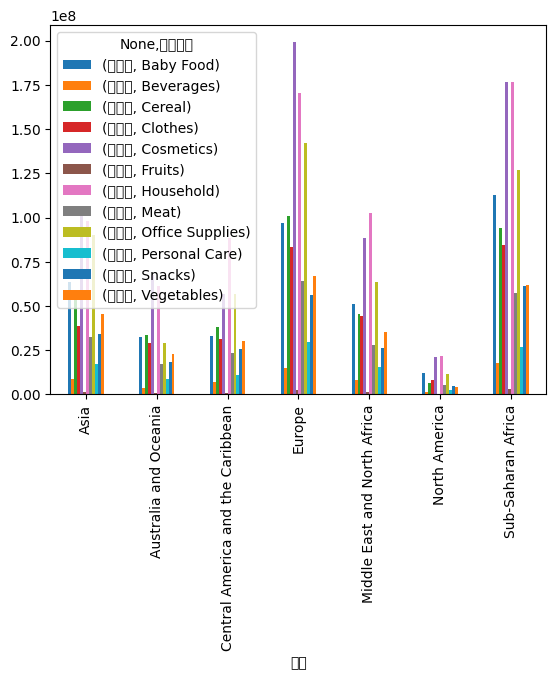

In [19]:
group_df.unstack().plot(kind='bar')

In [20]:
# 그래프의 한글깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='대륙'>

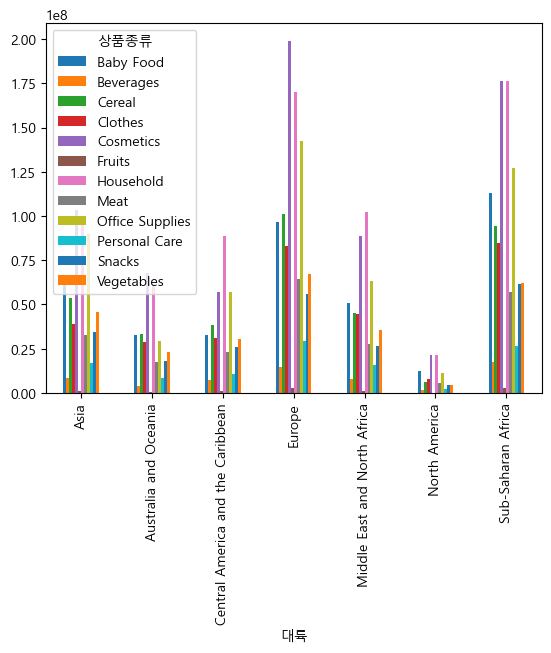

In [21]:
df.pivot_table(
    index = '대륙',
    columns='상품종류',
    values='총이윤',
    aggfunc='sum'
).plot(kind='bar')

- 시계열 데이터
    - 시간의 모든 정보를 하나의 클래스에서 관리하는 타입
        - 년, 월, 일, 시, 분, 초, 주, 요일, ... 많은 정보가 존재
        - 해당 정보들은 format에 따라 데이터를 추출이 가능

In [22]:
from datetime import datetime

In [23]:
time_str = '2025-09-16'

In [24]:
type(time_str)

str

In [25]:
datetime.strptime(time_str, "%Y-%m-%d")

datetime.datetime(2025, 9, 16, 0, 0)

In [26]:
# df에서 주문일자의 데이터를 시계열 데이터로 변환
# datetime 안에 존재하는 strptime()를 이용하여 변환
df['주문일자'] = df['주문일자'].map(
    lambda x : datetime.strptime(x, "%m/%d/%Y")
)


In [27]:
# to_datetime() -> pd 안에 있음
# why? 데이터타입을 변화시키는 to_가 아니기 때문일듯?
df['발송일자'] = pd.to_datetime(df['발송일자'])  #, format= "%m/%d/%Y")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대륙      10000 non-null  object        
 1   국가      10000 non-null  object        
 2   상품종류    10000 non-null  object        
 3   판매채널    10000 non-null  object        
 4   주문일자    10000 non-null  datetime64[ns]
 5   발송일자    10000 non-null  datetime64[ns]
 6   판매개수    10000 non-null  int64         
 7   단가      10000 non-null  float64       
 8   원가      10000 non-null  float64       
 9   총단가     10000 non-null  float64       
 10  총원가     10000 non-null  float64       
 11  총이윤     10000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 937.6+ KB


In [29]:
# 일반적인 시간 데이터인 datetime
time_str1 = "2025-09-01"
time_str2 = "2025-09-10"

time_data1 = datetime.strptime(time_str1, "%Y-%m-%d")
time_data2 = datetime.strptime(time_str2, "%Y-%m-%d")

time_data2 - time_data1

datetime.timedelta(days=9)

In [30]:
# pandas에서 제공하는 datetime64
df['배송기간'] = df['발송일자'] - df['주문일자']

<Axes: ylabel='국가'>

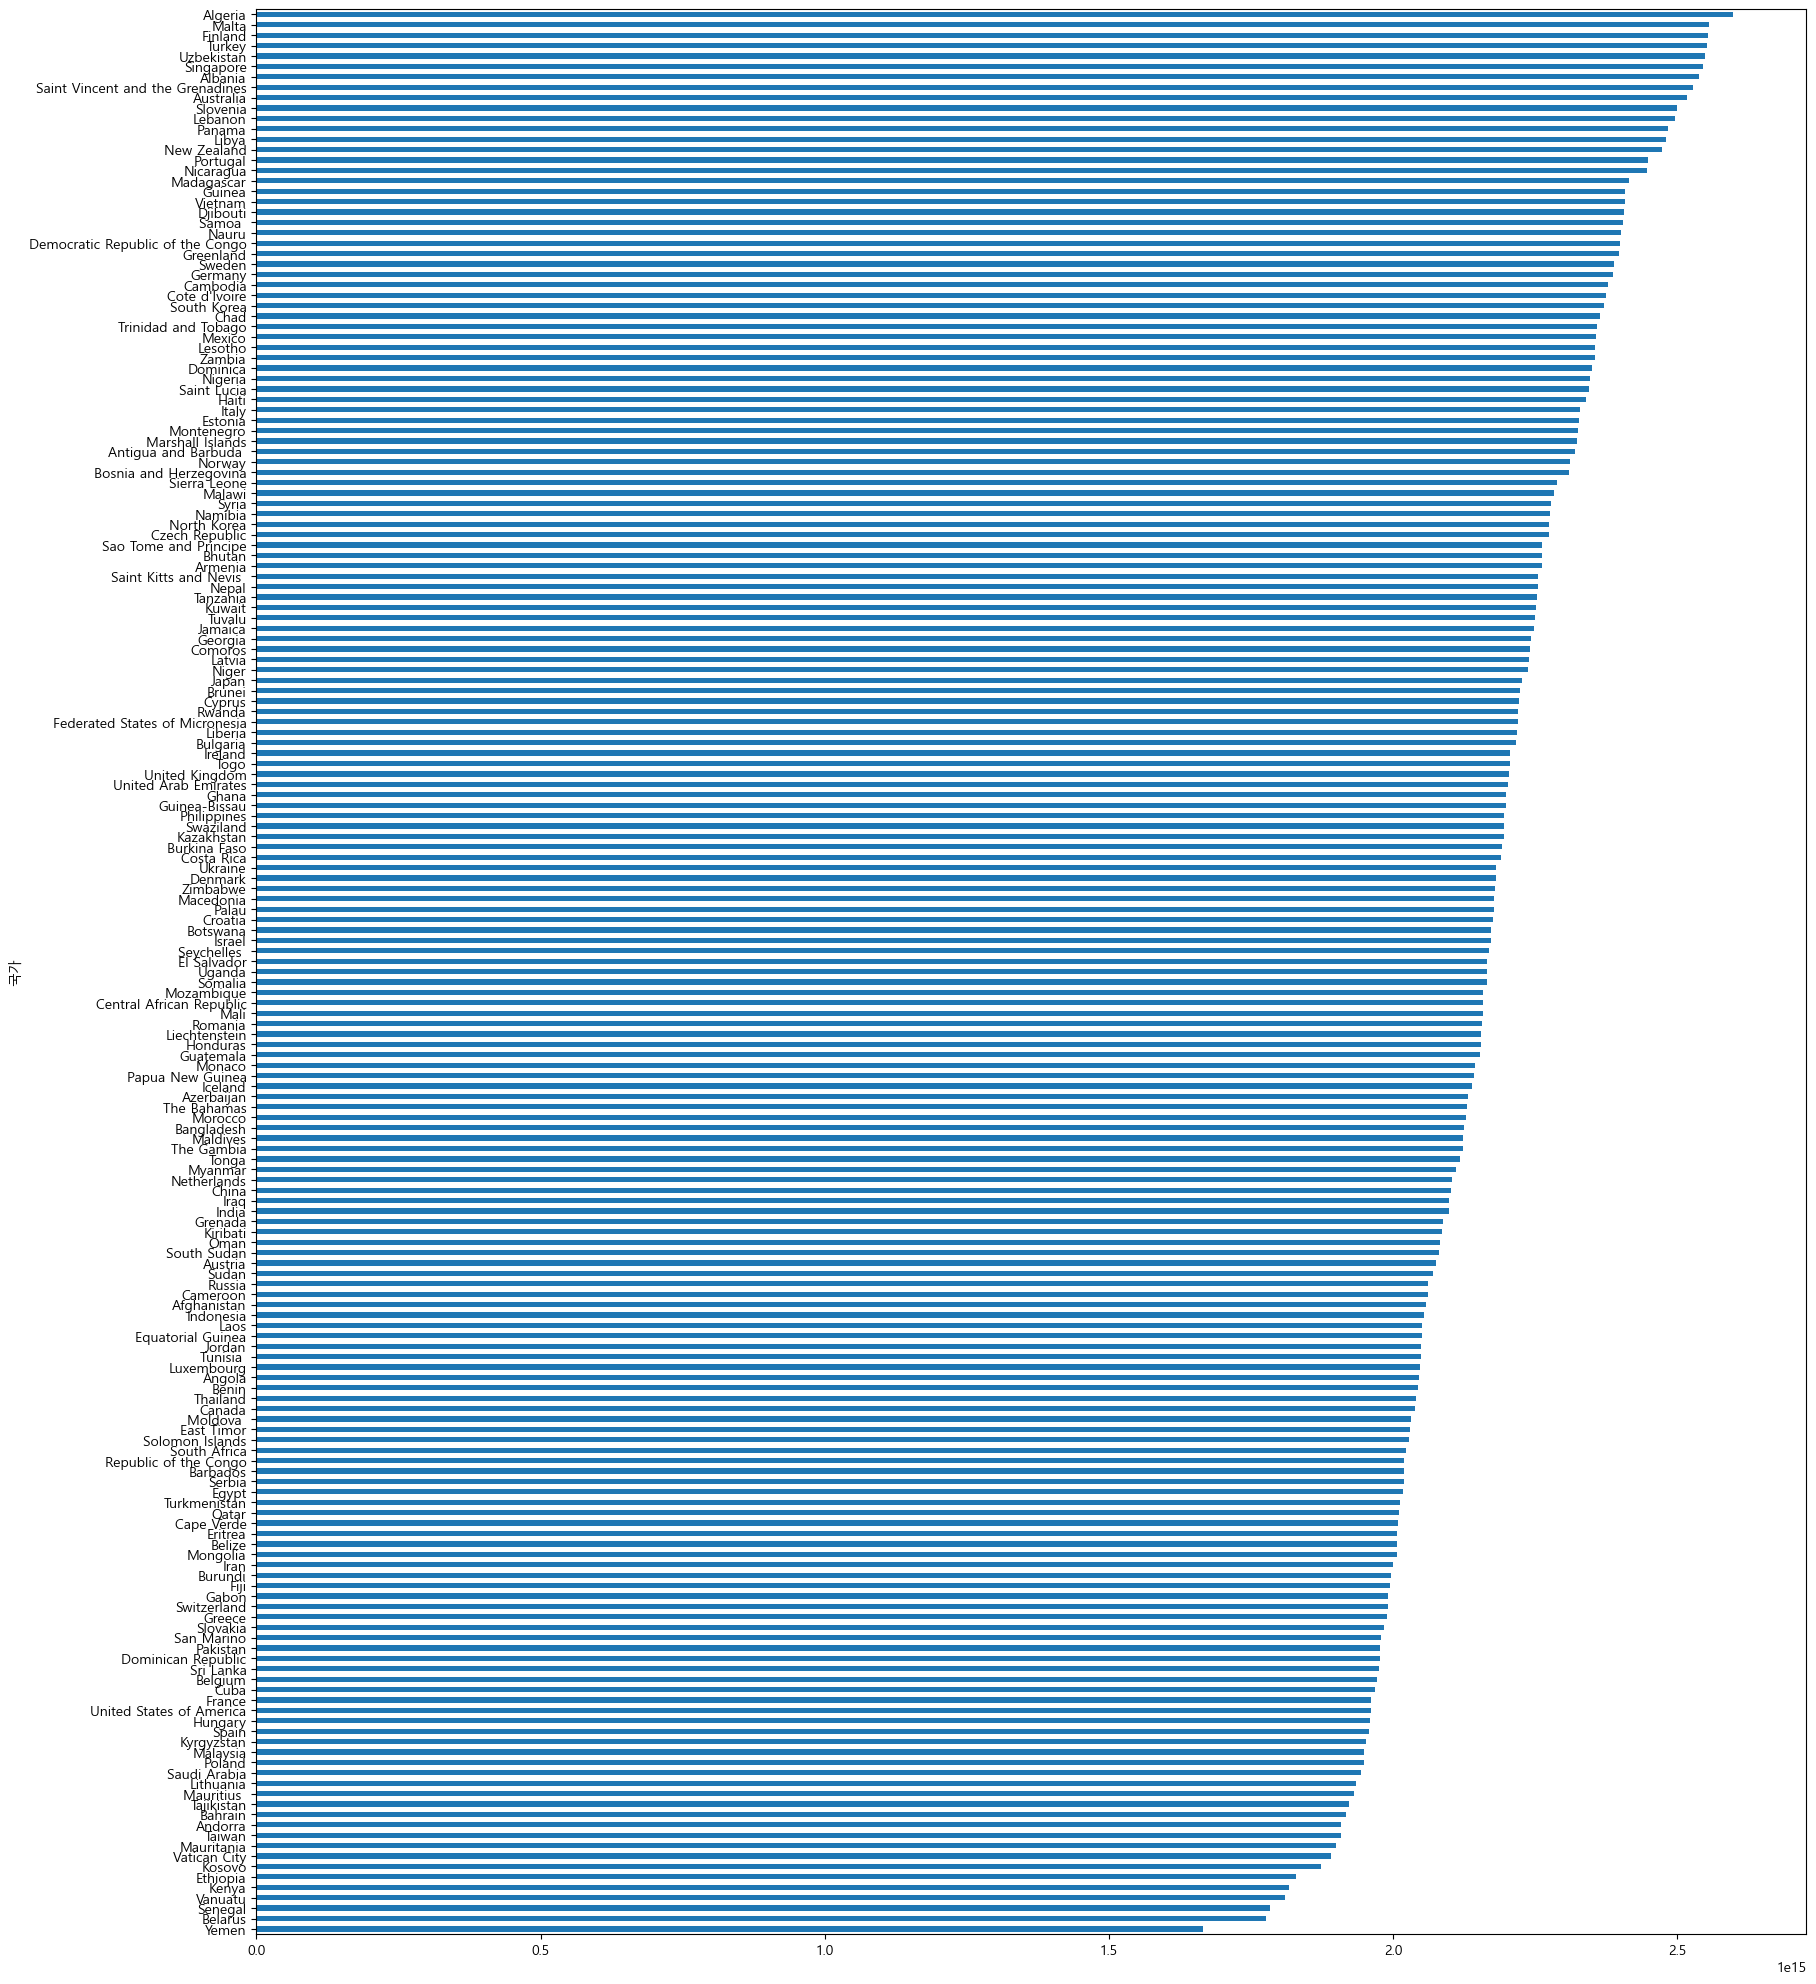

In [31]:
plt.figure(figsize=(20, 25))
df.groupby('국가')['배송기간'].mean().sort_values().plot(kind='barh')

In [32]:
# 월별 배송기간의 평균이 어떻게 되는가?
# 주문일자에서 월이라는 데잍터를 추출 -> datetime에서 str변환
df['주문년월'] = df['주문일자'].dt.strftime('%Y-%m')

In [33]:
df['주문월'] = df['주문일자'].dt.month

In [34]:
# 주문년월별 상품종류에 따라 총이윤의 합산 데이터를 확인하고 상품종류에 따라 그래프를 그린다.
group_data2 = df.groupby(['주문년월', '상품종류'])['총이윤'].sum()

In [35]:
group_data2 = group_data2.unstack()

# ['Baby Food'].plot()

In [36]:
group_data2

상품종류,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
주문년월,,,,,,,,,,,,
2010-01,2684175.86,319166.46,7528112.43,4802535.36,9527902.13,166955.16,7488344.32,2076588.8,5283310.00,1752069.90,3842927.16,4292271.83
2010-02,3893353.90,1056517.56,2836297.44,1850173.92,10158354.75,97720.68,2667092.89,1077476.4,10037506.25,662937.24,1221020.16,2829234.08
2010-03,7666595.22,736364.52,4545641.49,3083011.20,9637961.84,85217.60,6583789.98,1444185.6,4287323.75,704060.70,2106072.30,2416174.49
2010-04,1079479.46,662339.70,5183489.49,3420247.68,8566401.03,103039.55,7953548.43,2091804.0,2807547.50,1002425.06,2081810.70,2141053.95
2010-05,3166926.82,245642.76,3656197.89,3420761.76,2643867.22,83467.94,7740751.11,1883824.8,6484578.75,1700195.70,3305201.88,834515.47
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03,8657787.62,648073.44,3217057.26,1869782.40,9373157.83,99901.73,5130835.07,2389244.0,4387440.00,1856194.20,2195840.22,3558827.49
2017-04,2096074.76,1018087.92,5123425.47,1034255.52,4328841.39,55755.35,4612265.90,2864061.2,3989878.75,1780964.08,1252670.52,1686139.17
2017-05,3860569.78,569773.44,2977952.85,4143925.44,10493576.11,181330.81,10421433.86,2277475.2,5285456.25,1452427.48,3727188.30,4944846.64


In [37]:
group_data3 = df.groupby(['상품종류', '주문년월'])['총이윤'].sum()

In [38]:
group_data3

상품종류        주문년월   
Baby Food   2010-01    2684175.86
            2010-02    3893353.90
            2010-03    7666595.22
            2010-04    1079479.46
            2010-05    3166926.82
                          ...    
Vegetables  2017-03    3558827.49
            2017-04    1686139.17
            2017-05    4944846.64
            2017-06    4140381.05
            2017-07    3447150.52
Name: 총이윤, Length: 1092, dtype: float64

<Axes: xlabel='주문년월'>

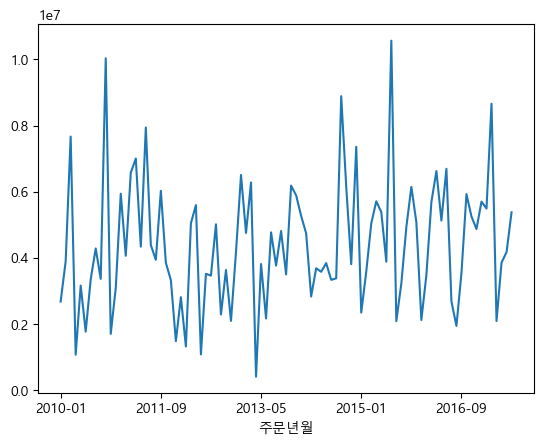

In [39]:
group_data3['Baby Food'].plot()

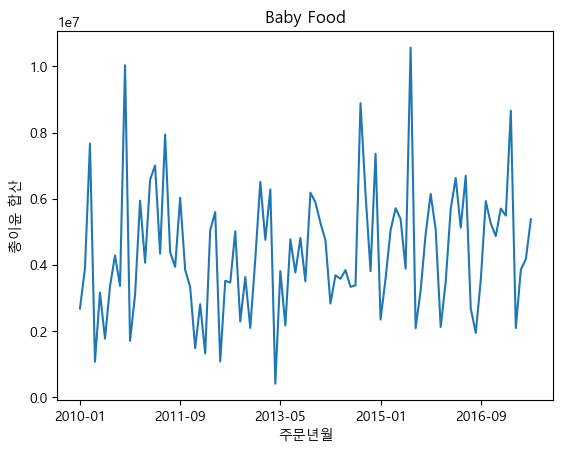

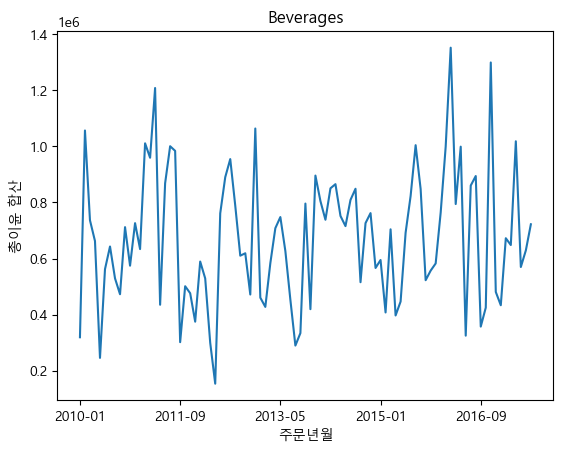

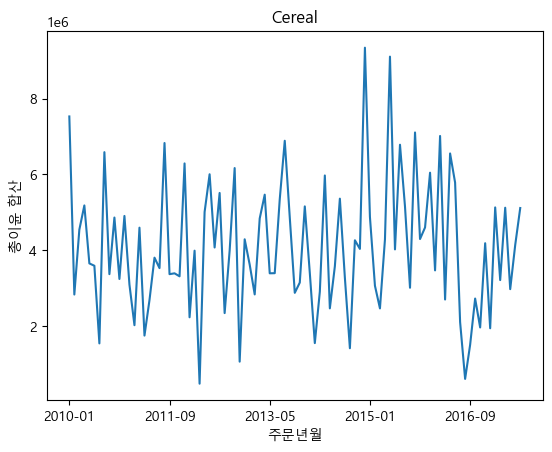

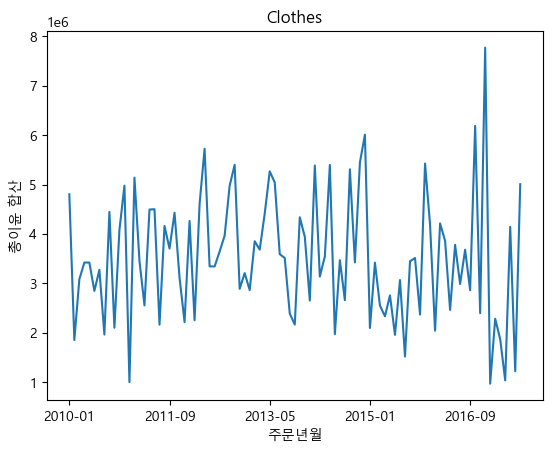

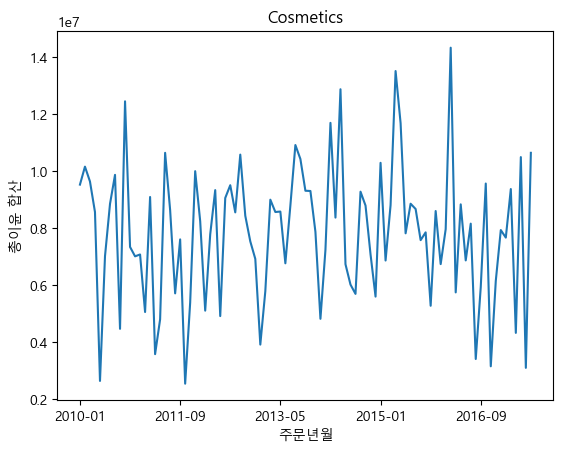

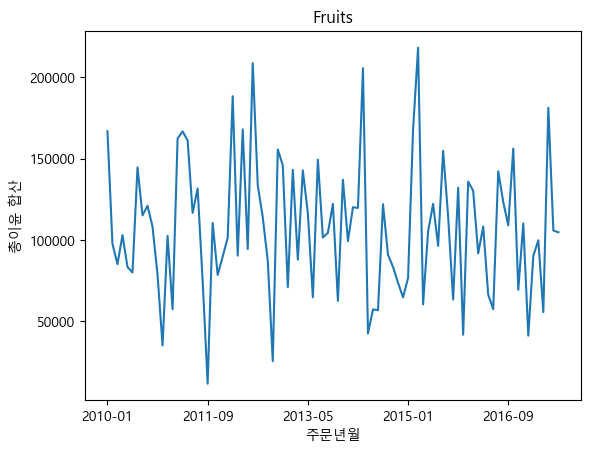

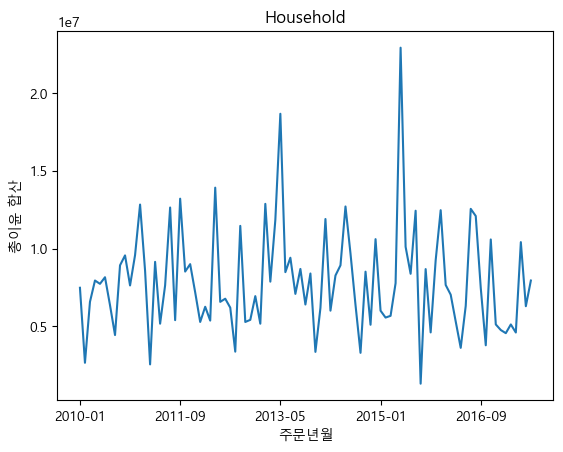

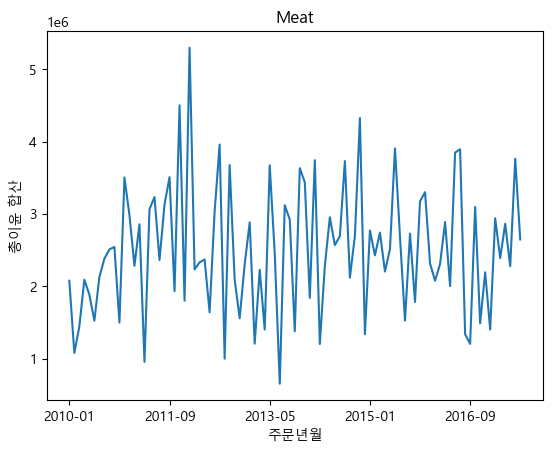

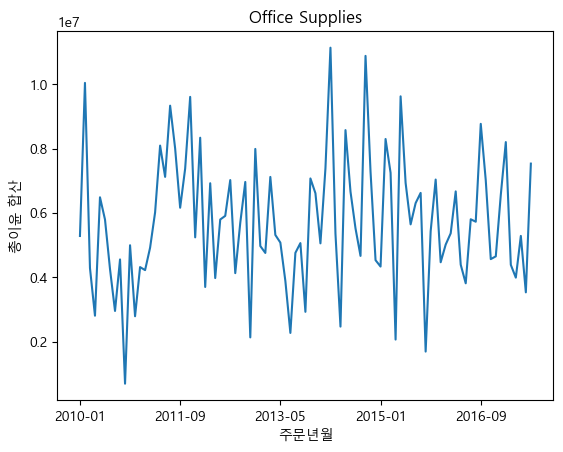

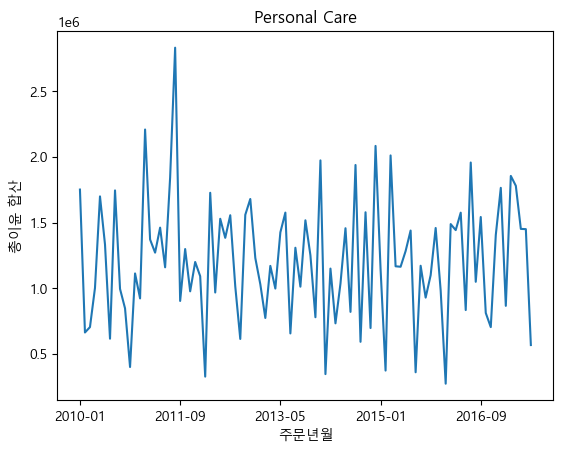

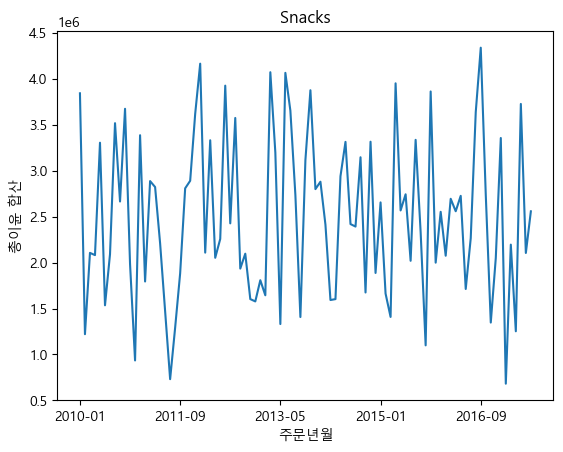

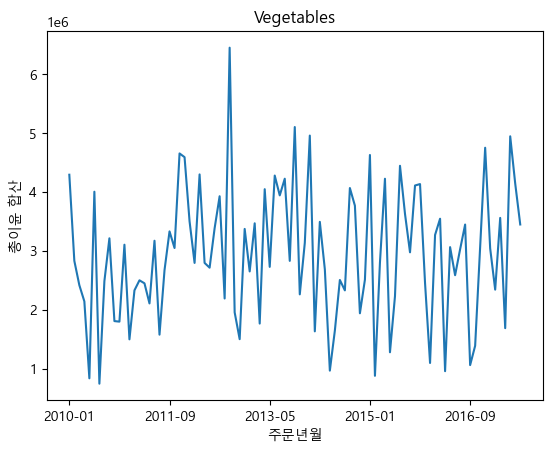

In [40]:
for i in group_data2.columns:
    group_data2[i].plot()
    
    plt.title(i)
    plt.ylabel('총이윤 합산')
    # 보여주고 지운다.
    plt.show()
    
# 차이가 균일하면 연속성을 갖는 데이터임을 증명할 수 있다.

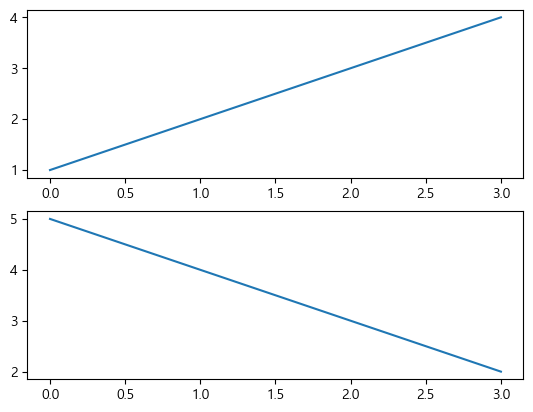

In [41]:
# 서브 플롯
# 그래프가 그려지는 공간 plt을 나눠주는 작업
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4])

# 공간을 이동
plt.subplot(2, 1, 2)
plt.plot([5, 4, 3, 2])

plt.show()

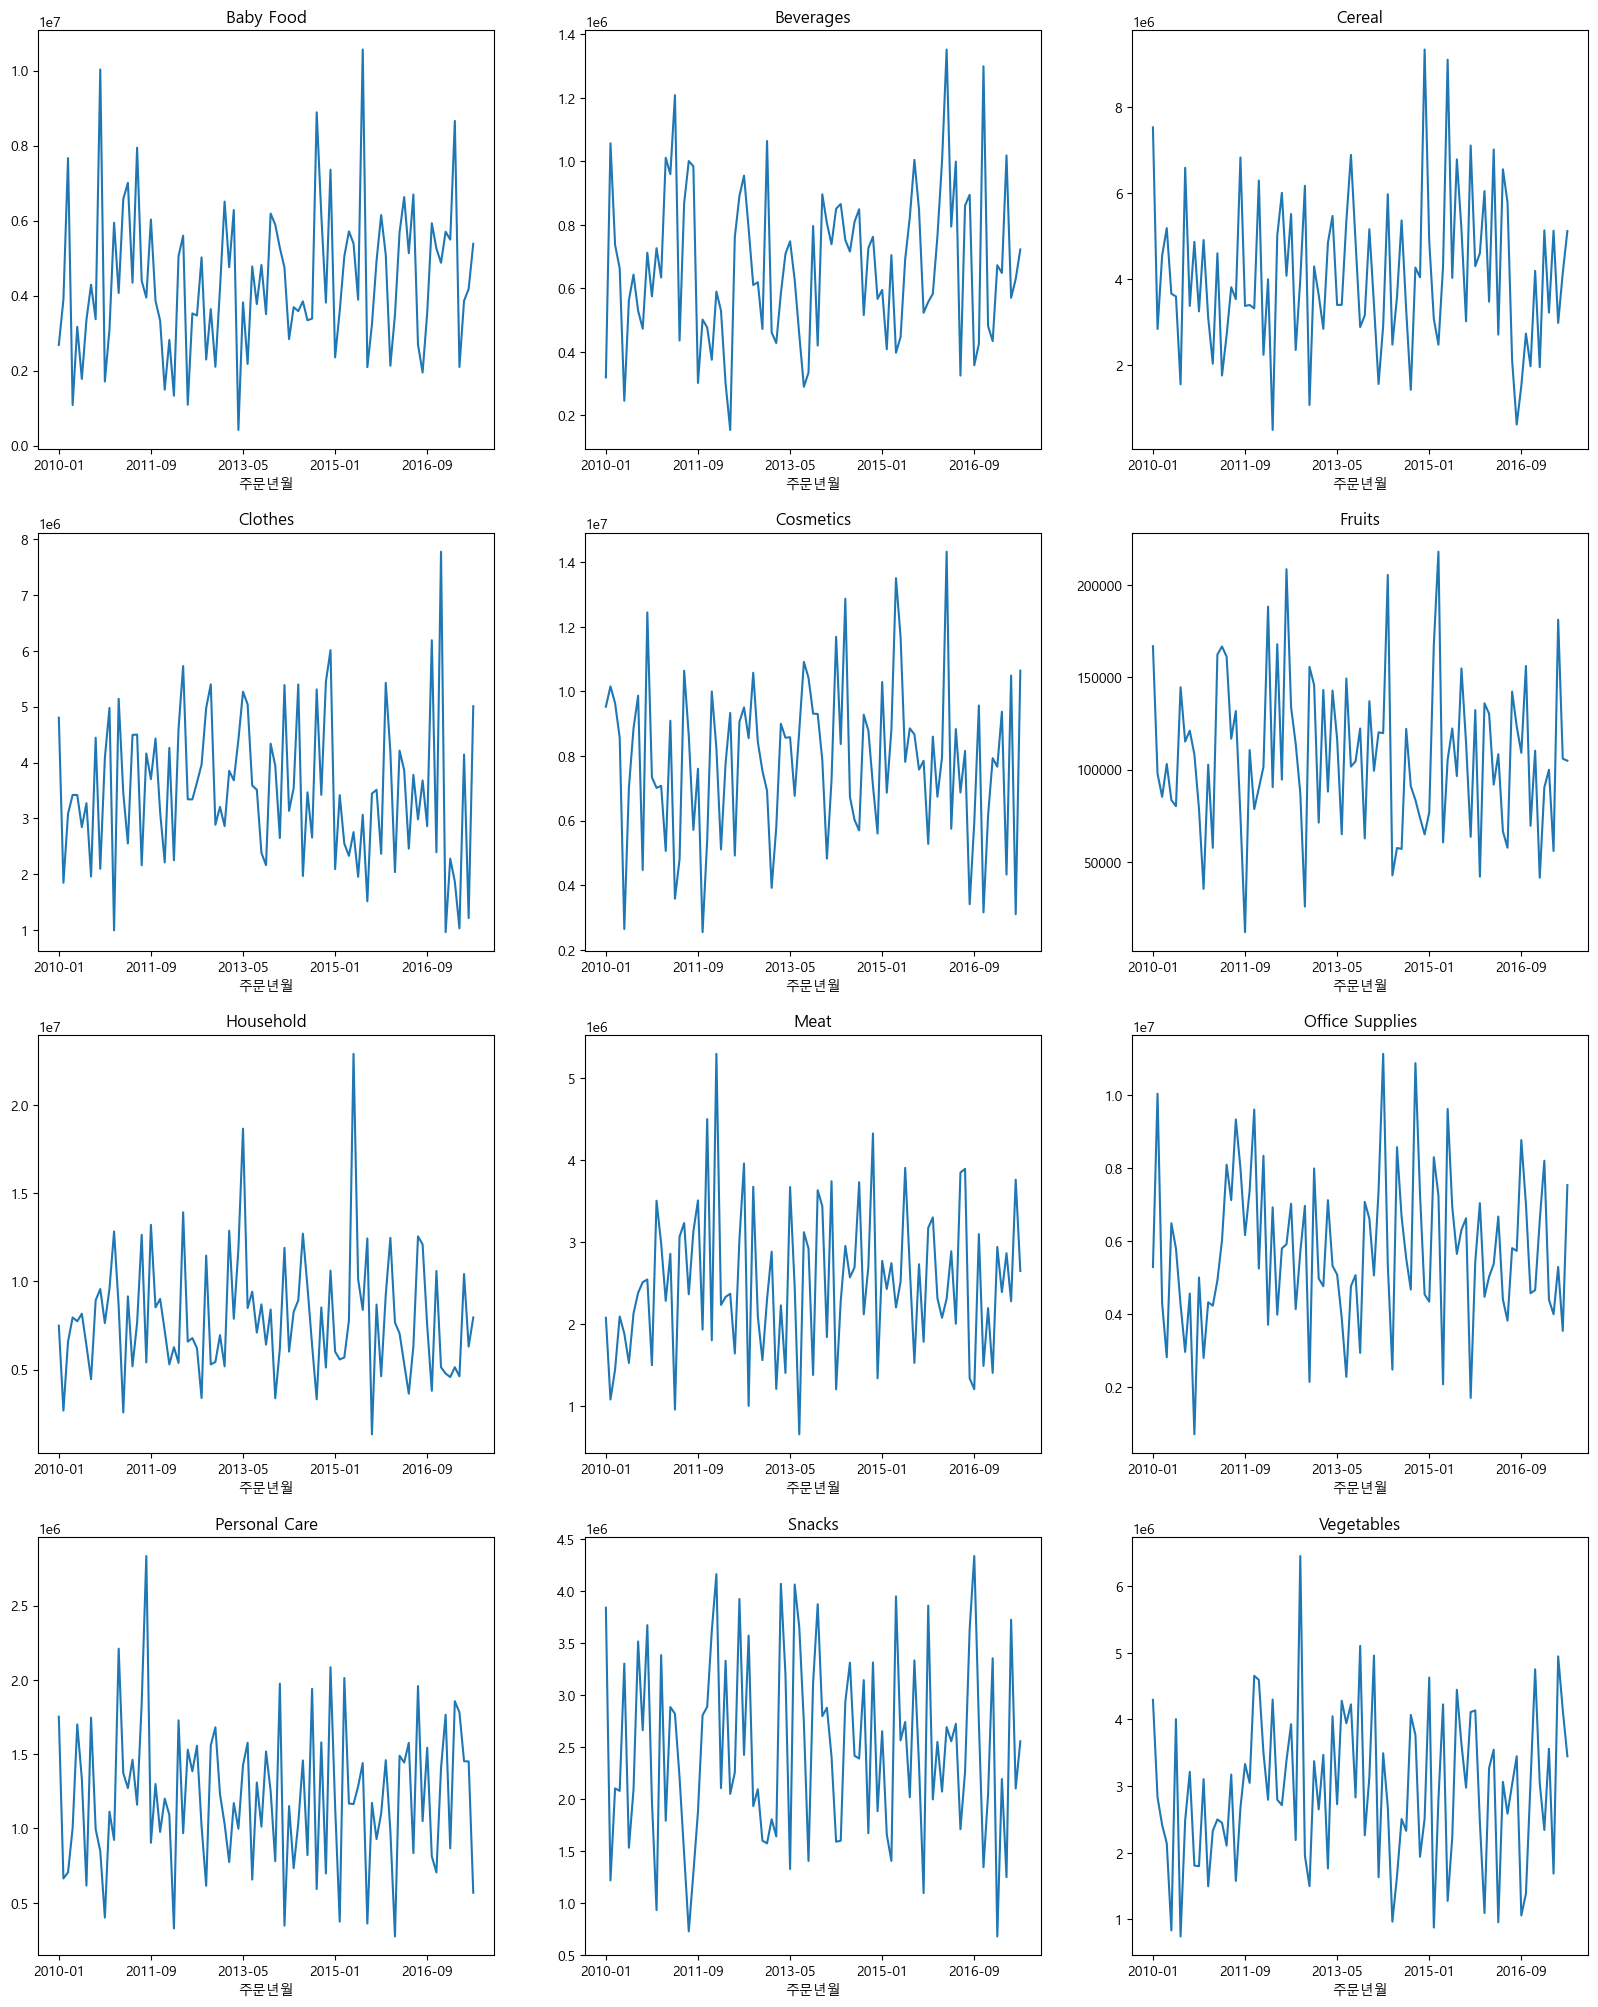

In [45]:
# 그래프의 영역 크기 조절
plt.figure(figsize=(20, 25))

for col in range(len(group_data2.columns)):
    # i는 index의 값 -> 0부터 11까지의 값
    # 서브플롯을 통해 공간을 나눠주고 위치를 잡는다.
    plt.subplot(4, 3, col + 1)
    # group_data에서 인덱스는 전체 컬럼은 i위치의 컬럼을 선택하여 라인 그래프 생성
    group_data2.iloc[:, col].plot()
    plt.title(group_data2.columns[col])
    
plt.show()
    
    
    